<a href="https://colab.research.google.com/github/MohammadAli147369/Machine-learning-projects/blob/main/Kaggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_df

,Id,Actor1,Actor2,Actor3,Director,Genre,Budget,Runtime,Language,LanguagesDubbedCount,TrailerViewCount,HitOrFlop
0,1,Aamir Khan,Akshay Kumar,Katrina Kaif,Anurag Kashyap,Comedy,214,128,Hindi,7,9,0
1,2,Aamir Khan,Ajay Devgn,Katrina Kaif,Anurag Kashyap,Drama,66,103,Hindi,1,6,1
2,3,Salman Khan,Akshay Kumar,Katrina Kaif,Anurag Kashyap,Science Fiction,138,109,Hindi,9,5,0
3,4,Aamir Khan,Ajay Devgn,Deepika Padukone,Anurag Kashyap,Horror,58,139,Hindi,7,2,1
4,5,Shah Rukh Khan,Sunny Deol,Katrina Kaif,Anurag Kashyap,Drama,72,187,Hindi,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,Aamir Khan,Ajay Devgn,Priyanka Chopra,Karan Johar,Horror,197,129,Hindi,10,5,1
696,697,Shah Rukh Khan,Akshay Kumar,Katrina Kaif,Anurag Kashyap,Science Fiction,184,127,Hindi,5,8,0
697,698,Shah Rukh Khan,Sunny Deol,Deepika Padukone,Karan Johar,Action,212,115,Hindi,10,9,0
698,699,Aamir Khan,Ajay Devgn,Priyanka Chopra,Karan Johar,Action,64,176,Hindi,10,8,0


Start the project with preprocessing the data.


In [ ]:
# Check for null values
train_df.isnull().sum()

Id                      0
Actor1                  0
Actor2                  0
Actor3                  0
Director                0
Genre                   0
Budget                  0
Runtime                 0
Language                0
LanguagesDubbedCount    0
TrailerViewCount        0
HitOrFlop               0
dtype: int64

In [ ]:
# Check for duplicates
train_df.duplicated().sum()

0

In [ ]:
train_df.describe()

,Id,Budget,Runtime,LanguagesDubbedCount,TrailerViewCount,HitOrFlop
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,147.024286,148.767143,5.437143,5.551429,0.435714
std,202.21688,58.843000,29.499668,2.900406,2.286099,0.496205
min,1.00000,50.000000,100.000000,1.000000,2.000000,0.000000
25%,175.75000,95.000000,125.000000,3.000000,4.000000,0.000000
50%,350.50000,143.000000,147.000000,5.000000,5.000000,0.000000
75%,525.25000,199.000000,174.000000,8.000000,8.000000,1.000000
max,700.00000,250.000000,200.000000,10.000000,9.000000,1.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    700 non-null    int64 
 1   Actor1                700 non-null    object
 2   Actor2                700 non-null    object
 3   Actor3                700 non-null    object
 4   Director              700 non-null    object
 5   Genre                 700 non-null    object
 6   Budget                700 non-null    int64 
 7   Runtime               700 non-null    int64 
 8   Language              700 non-null    object
 9   LanguagesDubbedCount  700 non-null    int64 
 10  TrailerViewCount      700 non-null    int64 
 11  HitOrFlop             700 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 65.8+ KB


In [ ]:
# test = pd.read_csv('/content/test.csv')
# test

Now we start the univarite analysis:

* We use Histograms to check the skewness of numerical columns.
* We ues Pie charts to check composition of catogorical columns.

In [ ]:
numerical_columns = train_df.select_dtypes(include=['int64']).columns.to_list()
numerical_columns

['Id',
 'Budget',
 'Runtime',
 'LanguagesDubbedCount',
 'TrailerViewCount',
 'HitOrFlop']

In [ ]:
categorical_columns = train_df.select_dtypes(include=['object']).columns.to_list()
categorical_columns

['Actor1', 'Actor2', 'Actor3', 'Director', 'Genre', 'Language']

In [ ]:
def univariate(data, col,bins):
  mean_value = data[col].mean()
  median_value = data[col].median()
  plt.figure(figsize=(8,8))
  sns.histplot(data[col], alpha=0.7, bins=bins)
  plt.title(f'Histogram of {col} with Mean and Median')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
  plt.axvline(median_value, color='green', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
  plt.legend()
  plt.show()

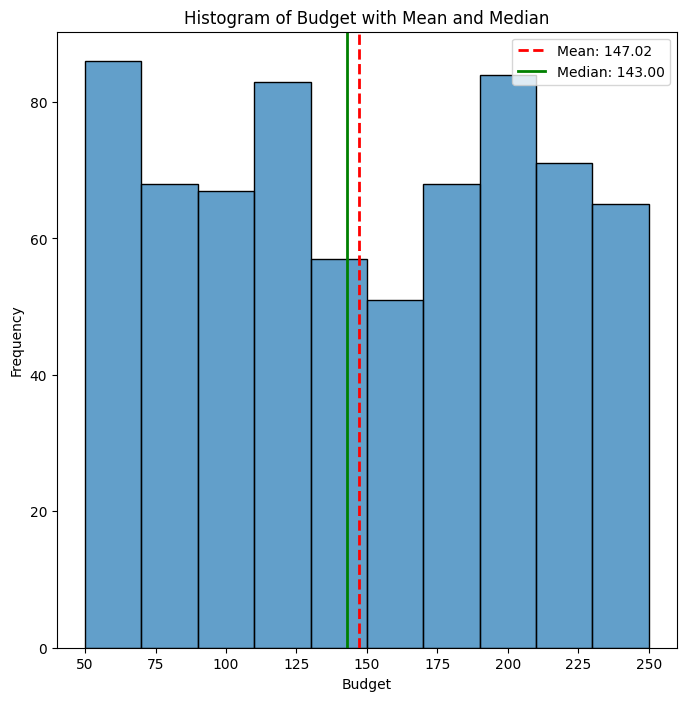

In [ ]:
univariate(train_df, 'Budget', 10)

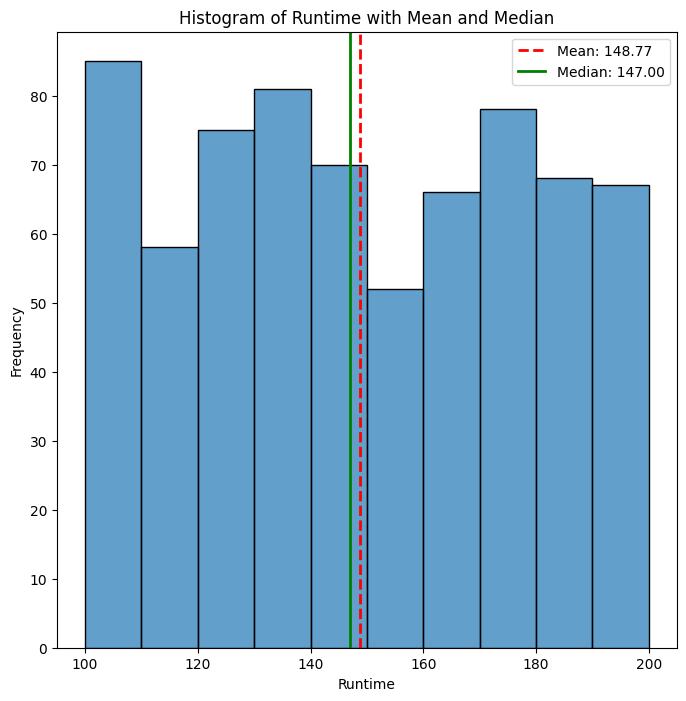

In [ ]:
univariate(train_df, 'Runtime', 10)

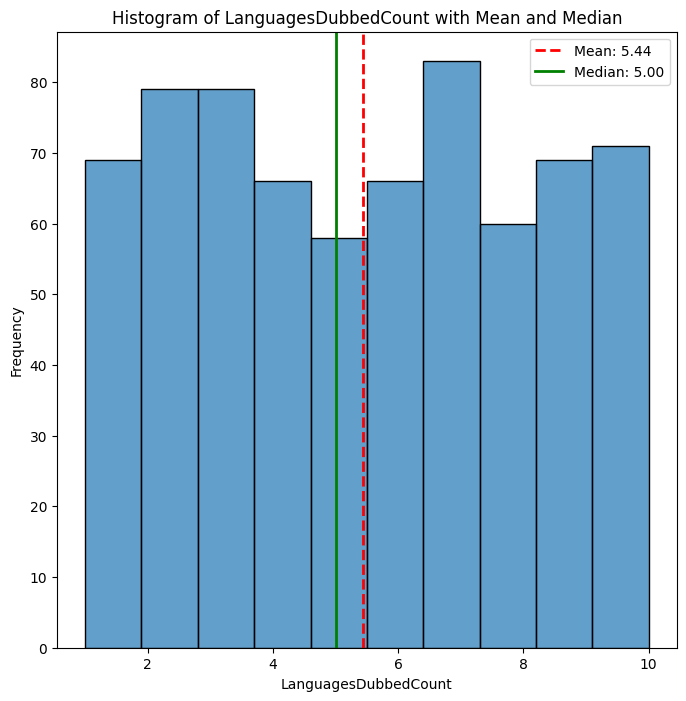

In [ ]:
univariate(train_df, 'LanguagesDubbedCount', 10)

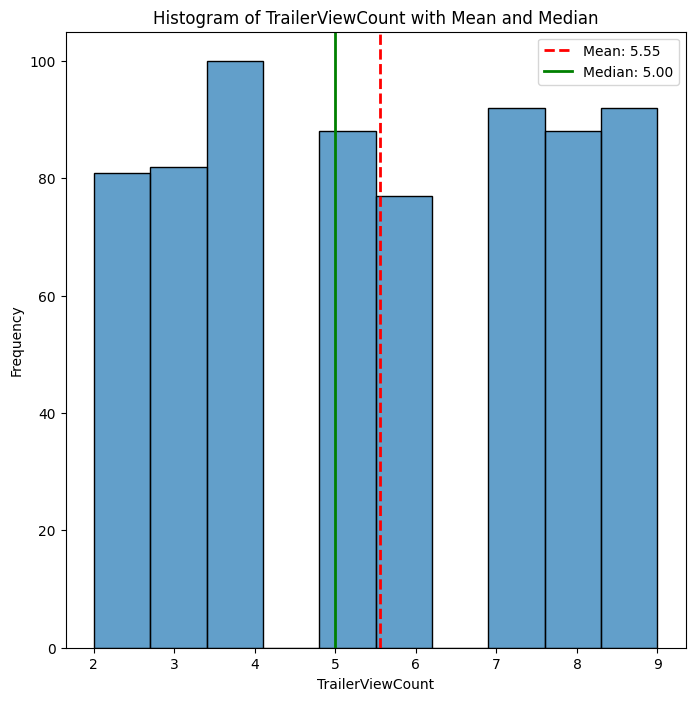

In [ ]:
univariate(train_df, 'TrailerViewCount', 10)

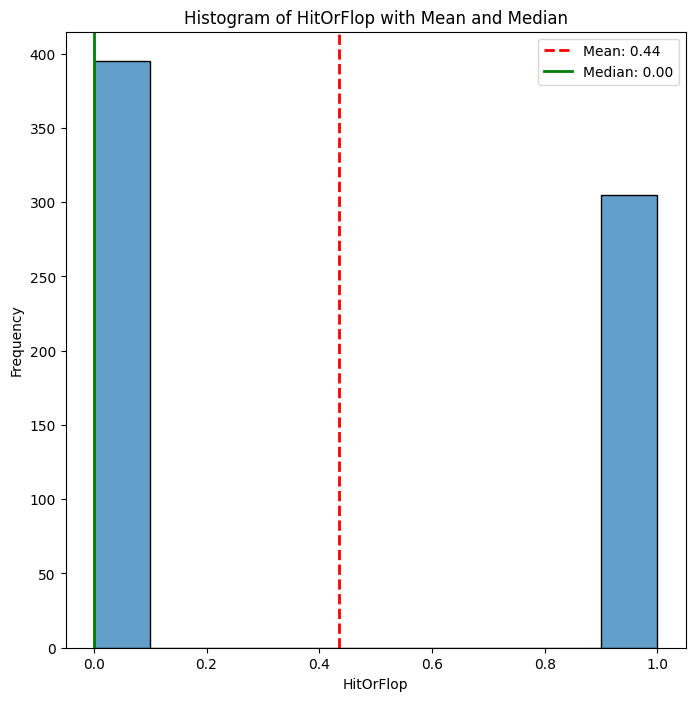

In [ ]:
univariate(train_df, 'HitOrFlop', 10)

In [ ]:
def plot_pie_chart(dataframe, col):
  data = dataframe[col].value_counts()
  plt.figure(figsize=(8,7))
  plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Pie chart of {col} name')
  plt.show()


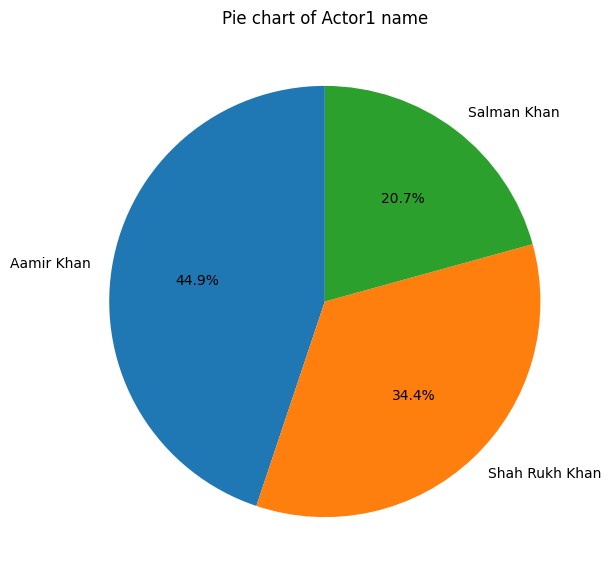

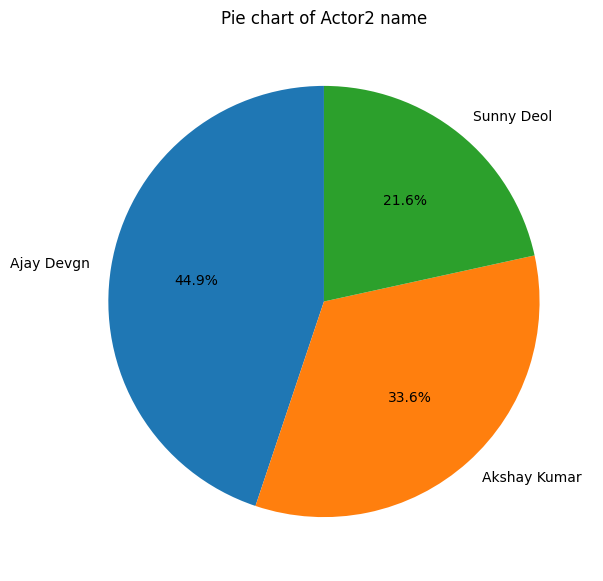

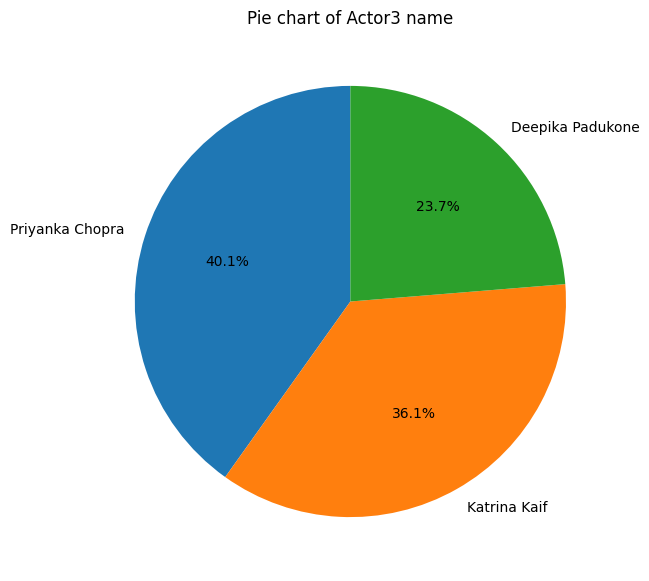

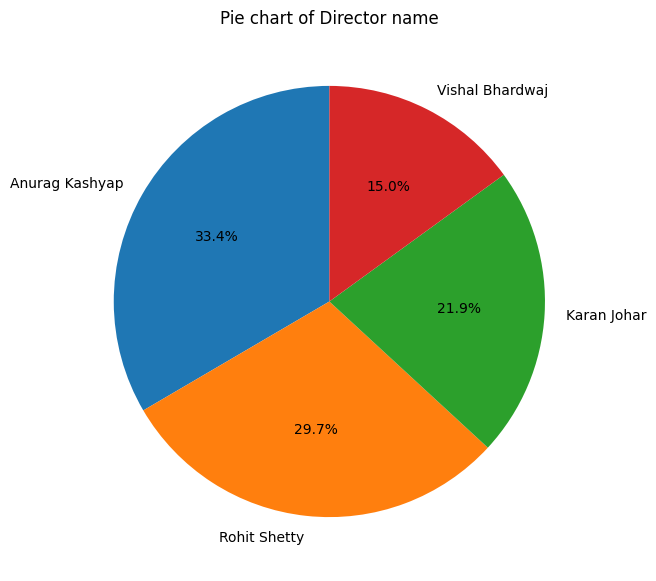

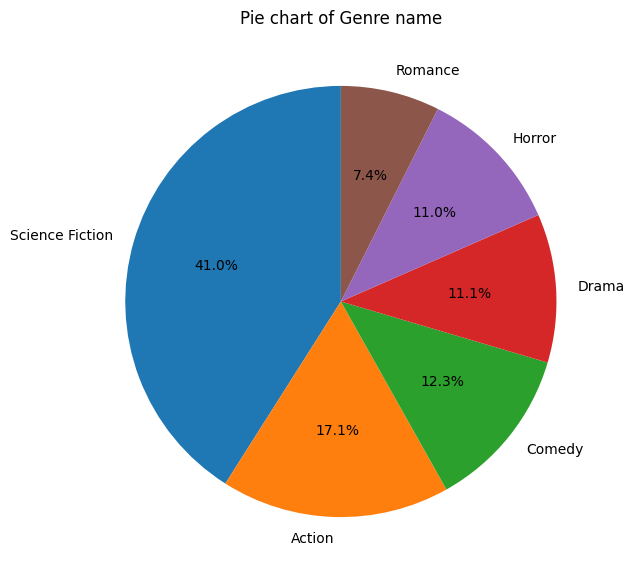

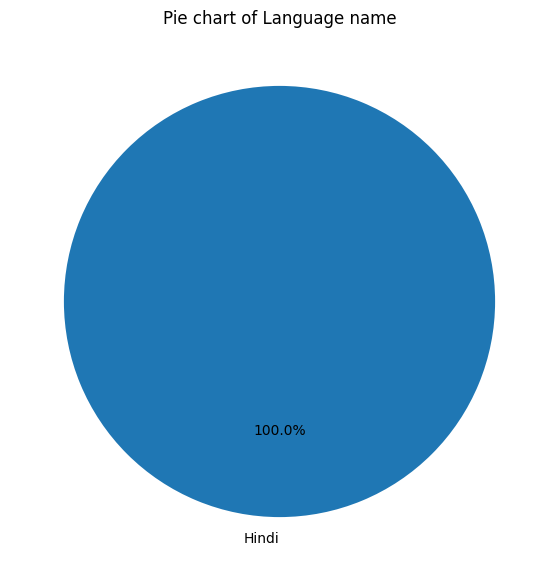

In [ ]:
for col in categorical_columns:
  plot_pie_chart(train_df, col)

We can drop the Language column as it does not have variation and only has one value.

In [ ]:
train_df.drop(columns=['Language', 'Id'],  inplace=True)
train_df

,Actor1,Actor2,Actor3,Director,Genre,Budget,Runtime,LanguagesDubbedCount,TrailerViewCount,HitOrFlop
0,Aamir Khan,Akshay Kumar,Katrina Kaif,Anurag Kashyap,Comedy,214,128,7,9,0
1,Aamir Khan,Ajay Devgn,Katrina Kaif,Anurag Kashyap,Drama,66,103,1,6,1
2,Salman Khan,Akshay Kumar,Katrina Kaif,Anurag Kashyap,Science Fiction,138,109,9,5,0
3,Aamir Khan,Ajay Devgn,Deepika Padukone,Anurag Kashyap,Horror,58,139,7,2,1
4,Shah Rukh Khan,Sunny Deol,Katrina Kaif,Anurag Kashyap,Drama,72,187,6,5,1
...,...,...,...,...,...,...,...,...,...,...
695,Aamir Khan,Ajay Devgn,Priyanka Chopra,Karan Johar,Horror,197,129,10,5,1
696,Shah Rukh Khan,Akshay Kumar,Katrina Kaif,Anurag Kashyap,Science Fiction,184,127,5,8,0
697,Shah Rukh Khan,Sunny Deol,Deepika Padukone,Karan Johar,Action,212,115,10,9,0
698,Aamir Khan,Ajay Devgn,Priyanka Chopra,Karan Johar,Action,64,176,10,8,0


Now we will use one hot encoding to convert the categorical columns to numerical column.


Bivariete anlaysis with the help of a heat map

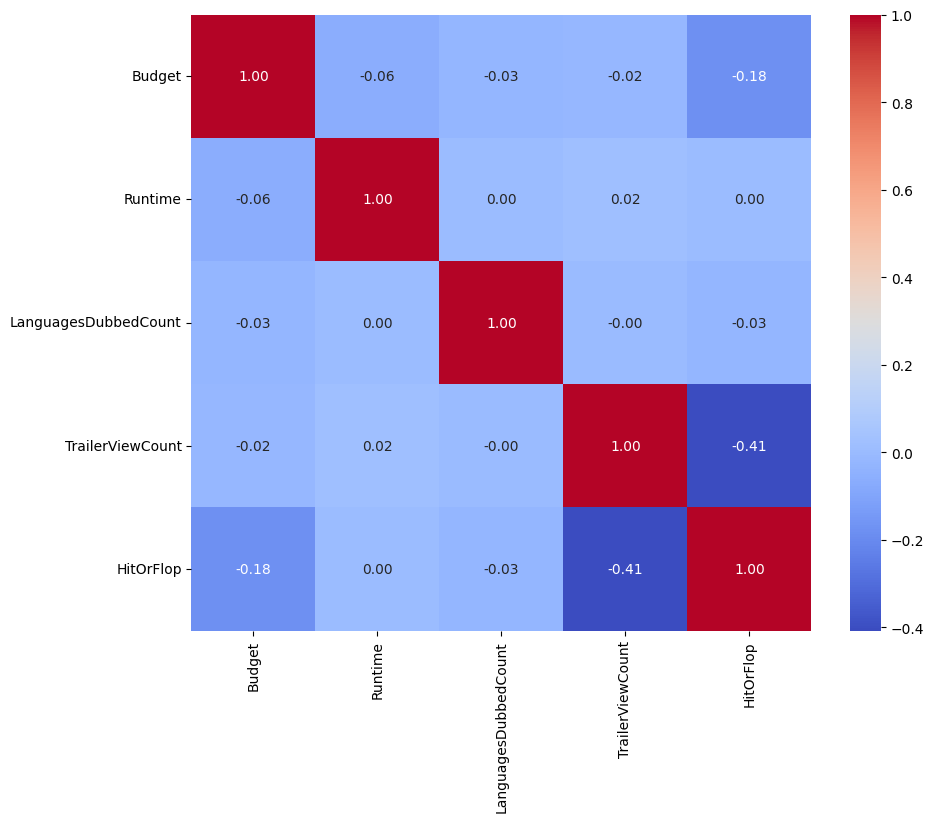

In [ ]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
categorical_columns.remove('Language')
categorical_columns

['Actor1', 'Actor2', 'Actor3', 'Director', 'Genre']

In [ ]:
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)
train_df

,Budget,Runtime,LanguagesDubbedCount,TrailerViewCount,HitOrFlop,Actor1_Salman Khan,Actor1_Shah Rukh Khan,Actor2_Akshay Kumar,Actor2_Sunny Deol,Actor3_Katrina Kaif,Actor3_Priyanka Chopra,Director_Karan Johar,Director_Rohit Shetty,Director_Vishal Bhardwaj,Genre_Comedy,Genre_Drama,Genre_Horror,Genre_Romance,Genre_Science Fiction
0,214,128,7,9,0,False,False,True,False,True,False,False,False,False,True,False,False,False,False
1,66,103,1,6,1,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,138,109,9,5,0,True,False,True,False,True,False,False,False,False,False,False,False,False,True
3,58,139,7,2,1,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,72,187,6,5,1,False,True,False,True,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,197,129,10,5,1,False,False,False,False,False,True,True,False,False,False,False,True,False,False
696,184,127,5,8,0,False,True,True,False,True,False,False,False,False,False,False,False,False,True
697,212,115,10,9,0,False,True,False,True,False,False,True,False,False,False,False,False,False,False
698,64,176,10,8,0,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [ ]:
x = train_df.drop(['HitOrFlop'], axis=1)
y = train_df['HitOrFlop']

In [ ]:
model1 = GradientBoostingClassifier(random_state=1)
model1.fit(x, y)


GradientBoostingClassifier(random_state=1)

In [ ]:
model1.score(x, y)

1.0

In [ ]:
print(classification_report(y, model1.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       305

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_test

,Id,Actor1,Actor2,Actor3,Director,Genre,Budget,Runtime,Language,LanguagesDubbedCount,TrailerViewCount
0,701,Aamir Khan,Akshay Kumar,Katrina Kaif,Anurag Kashyap,Drama,204,197,Hindi,1,8
1,702,Shah Rukh Khan,Ajay Devgn,Priyanka Chopra,Rohit Shetty,Science Fiction,249,173,Hindi,7,7
2,703,Shah Rukh Khan,Akshay Kumar,Katrina Kaif,Karan Johar,Science Fiction,95,140,Hindi,9,3
3,704,Shah Rukh Khan,Akshay Kumar,Deepika Padukone,Karan Johar,Comedy,180,139,Hindi,7,4
4,705,Salman Khan,Ajay Devgn,Katrina Kaif,Karan Johar,Science Fiction,234,148,Hindi,4,7
...,...,...,...,...,...,...,...,...,...,...,...
295,996,Aamir Khan,Ajay Devgn,Katrina Kaif,Rohit Shetty,Horror,194,107,Hindi,4,5
296,997,Aamir Khan,Akshay Kumar,Priyanka Chopra,Anurag Kashyap,Drama,183,184,Hindi,7,4
297,998,Aamir Khan,Akshay Kumar,Priyanka Chopra,Rohit Shetty,Drama,175,169,Hindi,2,2
298,999,Salman Khan,Akshay Kumar,Priyanka Chopra,Rohit Shetty,Action,128,146,Hindi,2,7


In [ ]:
df_test.drop(columns=['Language', 'Id'],  inplace=True)
df_test

,Actor1,Actor2,Actor3,Director,Genre,Budget,Runtime,LanguagesDubbedCount,TrailerViewCount
0,Aamir Khan,Akshay Kumar,Katrina Kaif,Anurag Kashyap,Drama,204,197,1,8
1,Shah Rukh Khan,Ajay Devgn,Priyanka Chopra,Rohit Shetty,Science Fiction,249,173,7,7
2,Shah Rukh Khan,Akshay Kumar,Katrina Kaif,Karan Johar,Science Fiction,95,140,9,3
3,Shah Rukh Khan,Akshay Kumar,Deepika Padukone,Karan Johar,Comedy,180,139,7,4
4,Salman Khan,Ajay Devgn,Katrina Kaif,Karan Johar,Science Fiction,234,148,4,7
...,...,...,...,...,...,...,...,...,...
295,Aamir Khan,Ajay Devgn,Katrina Kaif,Rohit Shetty,Horror,194,107,4,5
296,Aamir Khan,Akshay Kumar,Priyanka Chopra,Anurag Kashyap,Drama,183,184,7,4
297,Aamir Khan,Akshay Kumar,Priyanka Chopra,Rohit Shetty,Drama,175,169,2,2
298,Salman Khan,Akshay Kumar,Priyanka Chopra,Rohit Shetty,Action,128,146,2,7


In [ ]:
df_test = pd.get_dummies(df_test, columns=categorical_columns, drop_first=True)
df_test

,Budget,Runtime,LanguagesDubbedCount,TrailerViewCount,Actor1_Salman Khan,Actor1_Shah Rukh Khan,Actor2_Akshay Kumar,Actor2_Sunny Deol,Actor3_Katrina Kaif,Actor3_Priyanka Chopra,Director_Karan Johar,Director_Rohit Shetty,Director_Vishal Bhardwaj,Genre_Comedy,Genre_Drama,Genre_Horror,Genre_Romance,Genre_Science Fiction
0,204,197,1,8,False,False,True,False,True,False,False,False,False,False,True,False,False,False
1,249,173,7,7,False,True,False,False,False,True,False,True,False,False,False,False,False,True
2,95,140,9,3,False,True,True,False,True,False,True,False,False,False,False,False,False,True
3,180,139,7,4,False,True,True,False,False,False,True,False,False,True,False,False,False,False
4,234,148,4,7,True,False,False,False,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,194,107,4,5,False,False,False,False,True,False,False,True,False,False,False,True,False,False
296,183,184,7,4,False,False,True,False,False,True,False,False,False,False,True,False,False,False
297,175,169,2,2,False,False,True,False,False,True,False,True,False,False,True,False,False,False
298,128,146,2,7,True,False,True,False,False,True,False,True,False,False,False,False,False,False


In [ ]:
df_sample = pd.read_csv('/content/sample_submission.csv')
df_sample

,Id,HitOrFlop
0,701,0.0
1,702,NaN
2,703,NaN
3,704,NaN
4,705,NaN
...,...,...
295,996,NaN
296,997,NaN
297,998,NaN
298,999,NaN


In [ ]:
pred = model1.predict(df_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
df_sample['HitOrFlop'] = pd.DataFrame(pred)

In [ ]:
df_sample

,Id,HitOrFlop
0,701,0
1,702,0
2,703,0
3,704,0
4,705,0
...,...,...
295,996,0
296,997,1
297,998,1
298,999,1


In [ ]:
df_sample.to_csv('Sample Submission with Gradient Boost Classifier.csv', index=False)